In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load the data
path = "/content/drive/MyDrive/final_all_data.csv"
data = pd.read_csv(path)

# Perform basic statistical analysis
data_describe = data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()

# Display basic information and first few rows of the data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60395 entries, 0 to 60394
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   imo                       60395 non-null  int64  
 1   v_draft                   60395 non-null  float64
 2   v_departure_port          60395 non-null  object 
 3   v_departure_lat           60395 non-null  float64
 4   v_departure_lon           60395 non-null  float64
 5   v_arrival_port            60395 non-null  object 
 6   v_arrival_lat             60395 non-null  float64
 7   v_arrival_lon             60395 non-null  float64
 8   v_departure_time          60395 non-null  object 
 9   v_arrival_time            60395 non-null  object 
 10  v_sea_passage_start_time  60395 non-null  object 
 11  v_sea_passage_end_time    60395 non-null  object 
 12  ship_type                 60395 non-null  object 
 13  co2                       60395 non-null  float64
 14  seapas

,imo,v_draft,v_departure_port,v_departure_lat,v_departure_lon,v_arrival_port,v_arrival_lat,v_arrival_lon,v_departure_time,v_arrival_time,...,time_bf3,time_bf4,time_bf5,time_bf6,time_bf7,time_bf8,time_bf9,time_bf10,time_bf11,time_bf12
0,7801740,6.8,Sao Cristovao,-22.850000,-43.133333,Guanabara Bay Terminals,-22.813683,-43.155383,01/21/19 02:45 AM,01/22/19 06:55 PM,...,45206.875554,37049.896256,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,7801740,7.2,Acu Superport,-21.827500,-40.979367,Santos,-23.992733,-46.306067,04/26/19 07:53 PM,04/28/19 08:05 PM,...,76989.194793,60689.985169,8301.058044,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,7801740,8.0,Acu Superport,-21.827500,-40.979367,Rio de Janeiro,-22.882350,-43.197333,10/23/19 07:18 PM,10/24/19 05:19 PM,...,39758.155579,26014.879939,3532.756501,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,7801740,7.5,Marlim Oil Field,-22.340150,-40.204333,Governor's Island,-22.850000,-43.133333,01/03/19 04:20 PM,01/07/19 04:47 PM,...,108898.555701,36047.753298,23668.295669,30668.040468,0.0,0.0,0.0,0.0,0.0,0.0
4,7801740,7.6,Alemoa Terminal,-23.918333,-46.363300,Admiral Barroso Terminal,-23.808333,-45.386667,05/01/19 10:42 AM,05/14/19 12:43 PM,...,265237.869432,303342.698297,283328.780710,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Check for missing values
missing_values = data.isnull().sum()

# Display basic information and first few rows of the data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60395 entries, 0 to 60394
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   imo                       60395 non-null  int64  
 1   v_draft                   60395 non-null  float64
 2   v_departure_port          60395 non-null  object 
 3   v_departure_lat           60395 non-null  float64
 4   v_departure_lon           60395 non-null  float64
 5   v_arrival_port            60395 non-null  object 
 6   v_arrival_lat             60395 non-null  float64
 7   v_arrival_lon             60395 non-null  float64
 8   v_departure_time          60395 non-null  object 
 9   v_arrival_time            60395 non-null  object 
 10  v_sea_passage_start_time  60395 non-null  object 
 11  v_sea_passage_end_time    60395 non-null  object 
 12  ship_type                 60395 non-null  object 
 13  co2                       60395 non-null  float64
 14  seapas

,imo,v_draft,v_departure_port,v_departure_lat,v_departure_lon,v_arrival_port,v_arrival_lat,v_arrival_lon,v_departure_time,v_arrival_time,...,time_bf3,time_bf4,time_bf5,time_bf6,time_bf7,time_bf8,time_bf9,time_bf10,time_bf11,time_bf12
0,7801740,6.8,Sao Cristovao,-22.850000,-43.133333,Guanabara Bay Terminals,-22.813683,-43.155383,01/21/19 02:45 AM,01/22/19 06:55 PM,...,45206.875554,37049.896256,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,7801740,7.2,Acu Superport,-21.827500,-40.979367,Santos,-23.992733,-46.306067,04/26/19 07:53 PM,04/28/19 08:05 PM,...,76989.194793,60689.985169,8301.058044,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,7801740,8.0,Acu Superport,-21.827500,-40.979367,Rio de Janeiro,-22.882350,-43.197333,10/23/19 07:18 PM,10/24/19 05:19 PM,...,39758.155579,26014.879939,3532.756501,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,7801740,7.5,Marlim Oil Field,-22.340150,-40.204333,Governor's Island,-22.850000,-43.133333,01/03/19 04:20 PM,01/07/19 04:47 PM,...,108898.555701,36047.753298,23668.295669,30668.040468,0.0,0.0,0.0,0.0,0.0,0.0
4,7801740,7.6,Alemoa Terminal,-23.918333,-46.363300,Admiral Barroso Terminal,-23.808333,-45.386667,05/01/19 10:42 AM,05/14/19 12:43 PM,...,265237.869432,303342.698297,283328.780710,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Perform one-hot encoding for the 'ship_type' feature
encoder = OneHotEncoder(sparse=False)
ship_type_encoded = encoder.fit_transform(data[['ship_type']])
ship_type_encoded_df = pd.DataFrame(ship_type_encoded, columns=encoder.get_feature_names_out(['ship_type']))
data = pd.concat([data, ship_type_encoded_df], axis=1)  # Add the encoded ship_type columns to the DataFrame

# Perform label encoding for the 'imos' feature
label_encoder = LabelEncoder()
data['imos_encoded'] = label_encoder.fit_transform(data['imo'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# Perform k-means clustering for the 'seapassage_distance' feature
kmeans = KMeans(n_clusters=3).fit(data[['seapassage_distance']])  # You can choose the number of clusters (e.g., 5)
data['kmeans'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-6-5dba5144bbf5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


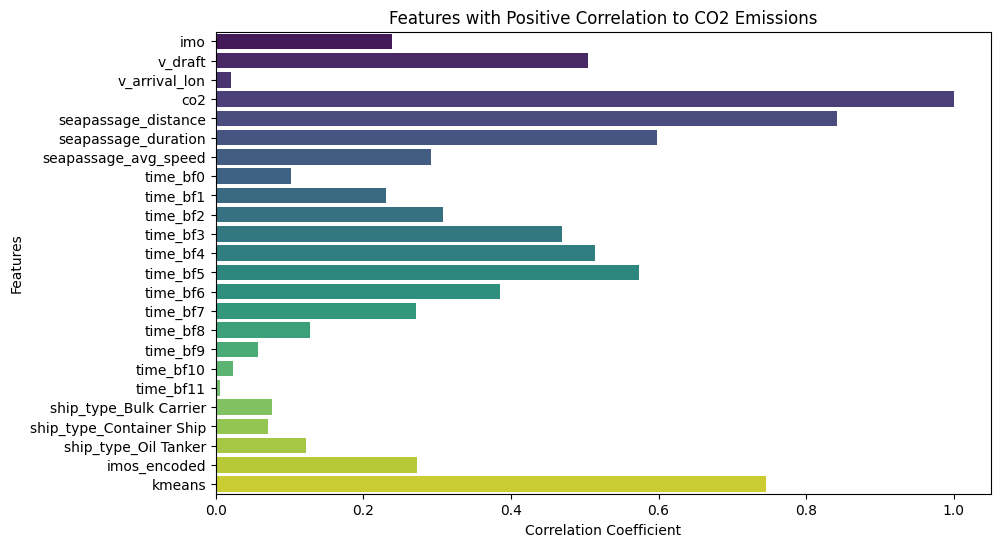

In [6]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Filter features with positive correlation to CO2 emissions
positive_corr_features = correlation_matrix['co2'][correlation_matrix['co2'] > 0]

# Create a bar plot to visualize positive correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=positive_corr_features.values, y=positive_corr_features.index, palette='viridis')
plt.title('Features with Positive Correlation to CO2 Emissions')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

In [7]:
# Drop the irrelevant features
data = data.drop(columns=['v_departure_port', 'v_arrival_port', 'v_departure_time', 'v_arrival_time', 'v_sea_passage_start_time', 'v_sea_passage_end_time', 'ship_type'])

In [8]:
from sklearn.model_selection import train_test_split

# Features for model development
features = [
    'imo', 'v_draft', 'v_arrival_lon',
    'seapassage_distance', 'seapassage_duration', 'seapassage_avg_speed', 'time_bf0', 'time_bf1',
    'time_bf2', 'time_bf3', 'time_bf4', 'time_bf5', 'time_bf6',
    'time_bf7', 'time_bf8', 'time_bf9', 'time_bf10', 'time_bf11',
    'ship_type_Bulk Carrier', 'ship_type_Container Ship', 'ship_type_Oil Tanker', 'imos_encoded', 'kmeans'
]


# Creating feature matrix X (input) and target vector y (output)
X = data[features]
y = data['co2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize a MinMaxScaler for the input features
input_scaler = MinMaxScaler(feature_range = (0,1))
output_scaler = MinMaxScaler(feature_range = (0,1))  # Separate scaler for the target variable

# Fit and transform the scaler on the training data for input features
X_train_scaled = input_scaler.fit_transform(X_train)

# Apply the scaler (transform only) to the test data for input features
X_test_scaled = input_scaler.transform(X_test)

# Fit and transform the scaler on the training target variable
y_train_scaled = output_scaler.fit_transform(y_train.values.reshape(-1, 1))

# You don't need to scale y_test here, as we will be using the original y_test for metrics
# y_test_scaled = output_scaler.transform(y_test.values.reshape(-1, 1))

In [9]:
from numpy.random.mtrand import RandomState
from sklearn.linear_model import LinearRegression

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_lr_scaled = linear_reg.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_lr = output_scaler.inverse_transform(y_pred_lr_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
nrmse_lr = rmse_lr / np.mean(y_test)

# Displaying the evaluation metrics for Linear Regression
(r2_lr, mae_lr, rmse_lr, nrmse_lr)

(0.7650175433245571, 164.17051859780668, 319.6871128406525, 1.164245142344983)

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_rf_scaled = random_forest.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_rf = output_scaler.inverse_transform(y_pred_rf_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
nrmse_rf = rmse_rf / np.mean(y_test)

# Displaying the evaluation metrics for Random Forest
(r2_rf, mae_rf, rmse_rf, nrmse_rf)

(0.9383314804057235, 53.79100859540317, 163.7718183301078, 0.5964286212527825)

In [11]:
import xgboost as xgb

# XGBoost
xgboost_model = xgb.XGBRegressor(random_state=42)
xgboost_model.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_xgb_scaled = xgboost_model.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_xgb = output_scaler.inverse_transform(y_pred_xgb_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
nrmse_xgb = rmse_xgb / np.mean(y_test)

# Displaying the evaluation metrics for XGBoost
(r2_xgb, mae_xgb, rmse_xgb, nrmse_xgb)

(0.9445863640008539,
 55.900609253111305,
 155.24432496128674,
 0.5653729661066909)

In [12]:
import lightgbm as lgb

# LightGBM
lightgbm_model = lgb.LGBMRegressor(random_state=42)
lightgbm_model.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_lgb_scaled = lightgbm_model.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_lgb = output_scaler.inverse_transform(y_pred_lgb_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_lgb = r2_score(y_test, y_pred_lgb)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
nrmse_lgb = rmse_lgb / np.mean(y_test)

# Displaying the evaluation metrics for LightGBM
(r2_lgb, mae_lgb, rmse_lgb, nrmse_lgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4096
[LightGBM] [Info] Number of data points in the train set: 48316, number of used features: 21
[LightGBM] [Info] Start training from score 0.016109


(0.9402872645708278, 58.47686768803214, 161.15392696423362, 0.5868947139306406)

In [13]:
from sklearn.model_selection import GridSearchCV

# Instantiate an XGBoost regressor object
xgb_reg = xgb.XGBRegressor(random_state=42)

# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Instantiate the GridSearchCV object
grid_reg = GridSearchCV(xgb_reg, param_grid, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_reg.fit(X_train_scaled, y_train_scaled.ravel())

# Print the best parameters
print("Best parameters found: ", grid_reg.best_params_)

# Instantiate an XGBoost regressor object with the best parameters
best_xgb_reg = xgb.XGBRegressor(random_state=42, **grid_reg.best_params_)

# Fit the model to the training data
best_xgb_reg.fit(X_train_scaled, y_train_scaled.ravel())

# Make predictions on the test data
y_pred_xgb_scaled = best_xgb_reg.predict(X_test_scaled)

# Inverse transform the predictions to get them back to the original scale
y_pred_xgb = output_scaler.inverse_transform(y_pred_xgb_scaled.reshape(-1, 1))

# Calculate R-squared, MAE, and RMSE on the original scale
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
nrmse_xgb = rmse_xgb / np.mean(y_test)

# Displaying the evaluation metrics for the best XGBoost model
(r2_xgb, mae_xgb, rmse_xgb, nrmse_xgb)

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


(0.9467983561145261, 51.1986489475471, 152.11426222696502, 0.5539738192931453)

In [14]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score

In [15]:
# Initialize a MinMaxScaler for the input features
input_scaler = MinMaxScaler(feature_range=(0, 1))
output_scaler = MinMaxScaler(feature_range=(0, 1))  # Separate scaler for the target variable

# Fit and transform the scaler on the entire dataset for input features
X_scaled = input_scaler.fit_transform(data[features])

# Fit and transform the scaler on the entire dataset for the target variable
y_scaled = output_scaler.fit_transform(data['co2'].values.reshape(-1, 1))

# Split the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=0
)

# Train the general model on the entire scaled dataset
# Instantiate an XGBoost regressor object with the best parameters found previously
general_model = xgb.XGBRegressor(random_state=42, **grid_reg.best_params_)
general_model.fit(X_train_scaled, y_train_scaled.ravel())

# Group the data by 'imo'
grouped_data = data.groupby('imo')
min_data_threshold = 10  # This threshold should be validated

# Initialize dictionaries for storing models and performance metrics
imo_specific_models = {}
ensemble_models = {}
performance_metrics = {}

# Function to calculate performance metrics
def evaluate_performance(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    nrmse = rmse / np.mean(y_true)
    return r2, mae, rmse, nrmse

# Perform selective training and create ensemble models
for imo, group in grouped_data:
    X_group = group[features]
    y_group = group['co2']

    # Scale the group data
    X_group_scaled = input_scaler.transform(X_group)
    y_group_scaled = output_scaler.transform(y_group.values.reshape(-1, 1))

    if len(X_group) >= min_data_threshold:
        # Split the group data
        X_train_group_scaled, X_test_group_scaled, y_train_group_scaled, y_test_group_scaled = train_test_split(
            X_group_scaled, y_group_scaled, test_size=0.2, random_state=0
        )

        # Clone the general model and retrain for this specific IMO
        imo_model = clone(general_model)
        imo_model.fit(X_train_group_scaled, y_train_group_scaled.ravel())

        # Save the IMO-specific model
        imo_specific_models[imo] = imo_model

        # Create an ensemble model using both the general and IMO-specific model
        ensemble = VotingRegressor(
            estimators=[
                ('general', clone(general_model)),
                ('imo_specific', imo_model)
            ],
            weights=[1, 1]  # These weights should be validated
        )

        # Fit the ensemble model
        ensemble.fit(X_train_group_scaled, y_train_group_scaled.ravel())

        # Store the ensemble model
        ensemble_models[imo] = ensemble

# Evaluate ensemble models on test data
for imo, group in grouped_data:
    X_group = group[features]
    y_group = group['co2']

    # Scale the group data
    X_group_scaled = input_scaler.transform(X_group)

    if imo in ensemble_models:
        # Use the ensemble model for this IMO
        model_to_use = ensemble_models[imo]

        # Make predictions
        y_pred_group_scaled = model_to_use.predict(X_group_scaled)
        y_pred_group = output_scaler.inverse_transform(y_pred_group_scaled.reshape(-1, 1))

        # Evaluate performance
        r2, mae, rmse, nrmse = evaluate_performance(y_group, y_pred_group)

        # Store the performance metrics
        performance_metrics[imo] = {
            'R2': r2,
            'MAE': mae,
            'RMSE': rmse,
            'NRMSE': nrmse
        }

# Print the performance metrics for each IMO
for imo, metrics in performance_metrics.items():
    print(f"IMO: {imo}, R2: {metrics['R2']}, MAE: {metrics['MAE']}, RMSE: {metrics['RMSE']}, NRMSE: {metrics['NRMSE']}")

# Convert the performance metrics into a DataFrame
#performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Display the performance metrics for each IMO
#print(performance_df)

IMO: 7801740, R2: 0.5839736964603526, MAE: 4.879680243785987, RMSE: 6.624001891422116, NRMSE: 0.29762457264292264
IMO: 7801764, R2: 0.8819963917725387, MAE: 5.600379473822452, RMSE: 7.7794405010957615, NRMSE: 0.3064176017295292
IMO: 7917018, R2: 0.8809476678134944, MAE: 4.149908811090556, RMSE: 6.133935597071768, NRMSE: 0.2353503688635555
IMO: 8027901, R2: 0.6895914862515624, MAE: 2.640435183897291, RMSE: 3.8786592015960437, NRMSE: 0.39386825573043155
IMO: 8101422, R2: 0.8225314428886822, MAE: 5.207392246086766, RMSE: 7.051438793304209, NRMSE: 0.400482837275044
IMO: 8104539, R2: 0.2137147215651204, MAE: 2.0072115295501383, RMSE: 2.548616056169497, NRMSE: 0.38040239696537864
IMO: 8125167, R2: 0.1496645105646749, MAE: 2.011931278260581, RMSE: 2.7348812971178154, NRMSE: 0.45923532196853095
IMO: 8127268, R2: -0.0008802840410591095, MAE: 1.160900375482821, RMSE: 1.5295311116299375, NRMSE: 0.37705137791161997
IMO: 8202941, R2: 0.754209612267651, MAE: 6.273273676724623, RMSE: 10.8046846494179

In [16]:
# Convert the performance metrics into a DataFrame
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Save the DataFrame to a CSV file
# Save the results DataFrame to a CSV file
performance_df.to_csv('final_results.csv')